In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [22]:
X=pd.read_csv('../kaggle/sign_lang/sign_mnist_train.csv')
X_test=pd.read_csv('../kaggle/sign_lang/sign_mnist_test.csv')

In [23]:
X.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [24]:
X_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [25]:
X['label']=X['label'].apply(lambda x: x-1 if x>8 else x)
X_test['label']=X_test['label'].apply(lambda x: x-1 if x>8 else x)

In [26]:
y_train = X['label'].values
y_test = X_test['label'].values
train = X.drop('label',axis=1).values
test = X_test.drop('label', axis=1).values

In [27]:
train.shape

(27455, 784)

In [28]:
test.shape

(7172, 784)

In [29]:
train = train.reshape(train.shape[0],28,28,1 )
test = test.reshape(test.shape[0],28,28,1 )

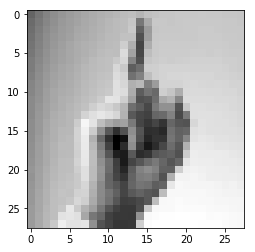

In [30]:
plt.imshow(train[0].reshape(28,28), cmap='gray')

In [31]:
y_train.shape

(27455,)

In [32]:
n_classes = len(np.unique(y_train))

In [33]:
n_classes

24

In [34]:
model = tf.keras.Sequential()

In [35]:
model.add(Conv2D(filters=6, kernel_size=(3,3), activation='relu', padding='same',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=12, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=n_classes, activation='softmax'))

In [36]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
y_train.shape

(27455,)

In [38]:
y_train = tf.keras.utils.to_categorical(y_train, n_classes)

In [39]:
y_test = tf.keras.utils.to_categorical(y_test,n_classes)

In [40]:
model.fit(train/255, y_train, validation_split=0.1, epochs=5, batch_size=64)

Train on 24709 samples, validate on 2746 samples
Epoch 1/5
24709/24709 [==============================] - 2s 67us/sample - loss: 1.7457 - acc: 0.4939 - val_loss: 0.6520 - val_acc: 0.8099
Epoch 2/5
24709/24709 [==============================] - 1s 54us/sample - loss: 0.5332 - acc: 0.8342 - val_loss: 0.2085 - val_acc: 0.9534
Epoch 3/5
24709/24709 [==============================] - 1s 55us/sample - loss: 0.2545 - acc: 0.9181 - val_loss: 0.0747 - val_acc: 0.9836
Epoch 4/5
24709/24709 [==============================] - 1s 54us/sample - loss: 0.1389 - acc: 0.9563 - val_loss: 0.0447 - val_acc: 0.9883
Epoch 5/5
24709/24709 [==============================] - 1s 55us/sample - loss: 0.0902 - acc: 0.9715 - val_loss: 0.0090 - val_acc: 0.9996


In [ ]:
model.evaluate(x_test)